<a href="https://colab.research.google.com/github/sunmarknatecom/01_markcv/blob/master/step6_central_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import cv2

IDX = 4
SER = 1

ROOT_PATH = "/content/drive/MyDrive/segmentation/data/seg_%03d/seg_%03d_%d/mask/"%(IDX, IDX, SER)

LIST_FILE = sorted(glob(ROOT_PATH+"*.png"))

LIST_MASK_OBJ = []

for elem in LIST_FILE:
    obj = Image.open(elem)
    arr = np.array(obj, dtype='uint8') * 255
    LIST_MASK_OBJ.append(arr)
    del obj, arr

In [ ]:
# original images, 1 channel
NPA_MASK_OBJ = np.array(LIST_MASK_OBJ)

# 3 channel images for view, and contour list

LIST_3CH_IMG = []
LIST_MASK_CNT = []


for i, elem2 in enumerate(NPA_MASK_OBJ):
    obj_3ch = cv2.cvtColor(elem2, cv2.COLOR_GRAY2RGB)
    obj_cnt, harch = cv2.findContours(elem2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    LIST_3CH_IMG.append(obj_3ch)
    LIST_MASK_CNT.append(obj_cnt)
    print("%03d image, No of contours: %d"%(i, len(obj_cnt)))

COLOR_SET = ((255, 0, 0), (0, 0, 255), (0, 255, 0))
LIST_PLT_IMGS = []

temp_img = LIST_3CH_IMG[0]
temp_cnt = LIST_MASK_CNT[0]

In [ ]:
cv2.drawContours(temp_img, temp_cnt, 0, (255, 0, 0), -1)
plt.imshow(temp_img)
plt.show()

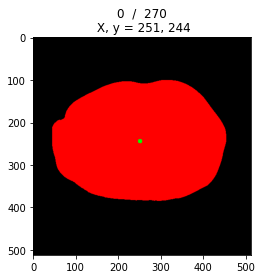

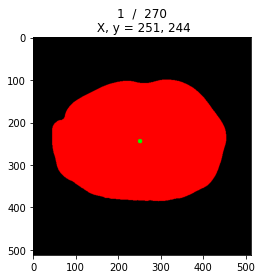

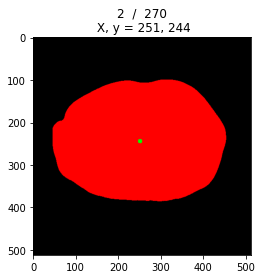

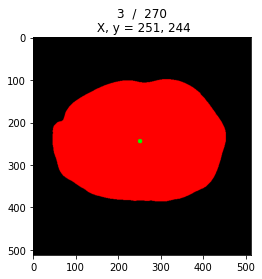

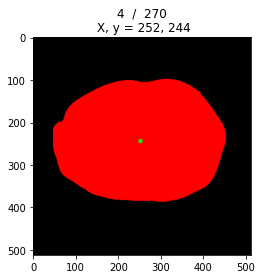

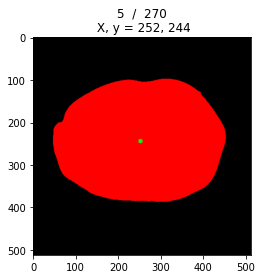

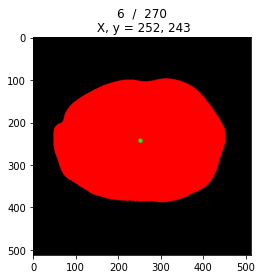

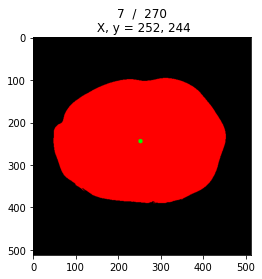

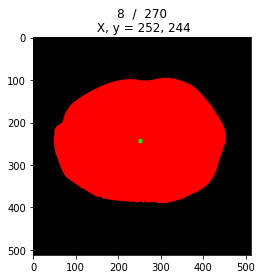

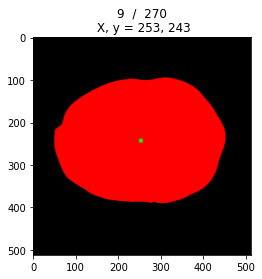

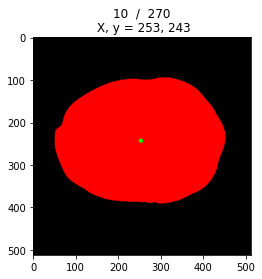

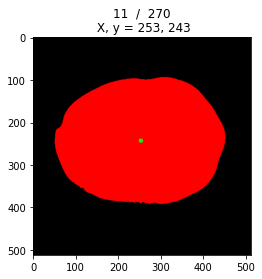

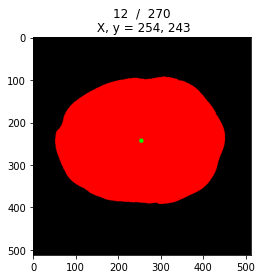

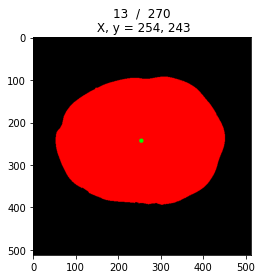

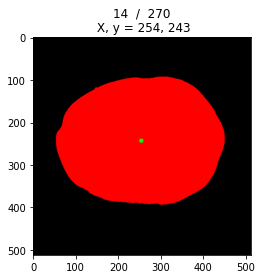

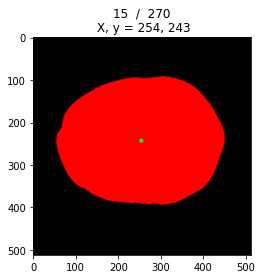

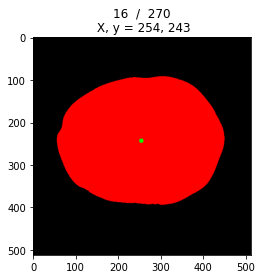

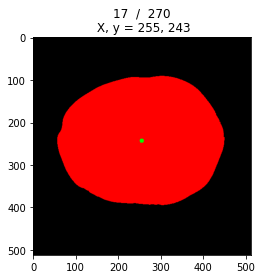

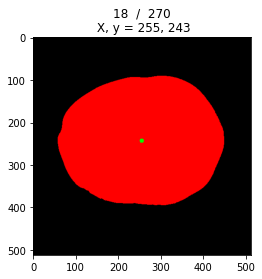

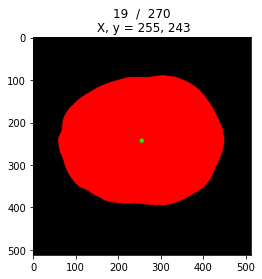

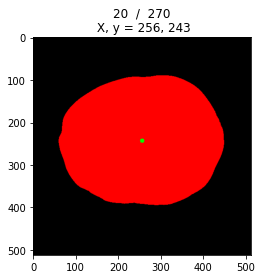

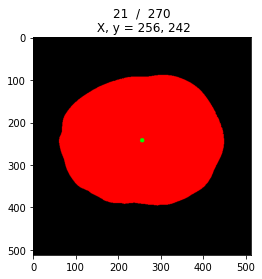

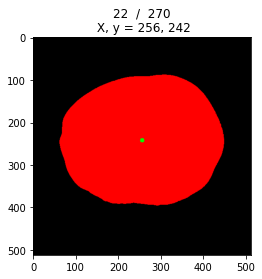

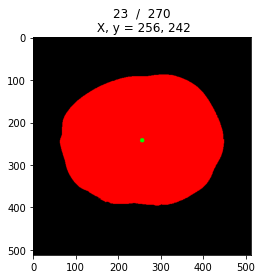

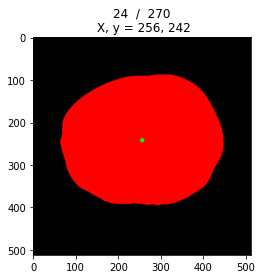

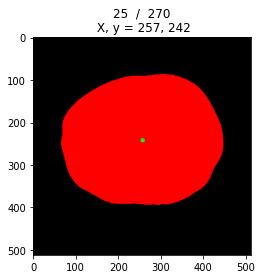

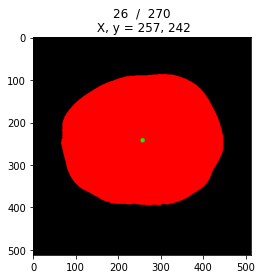

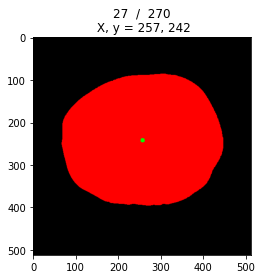

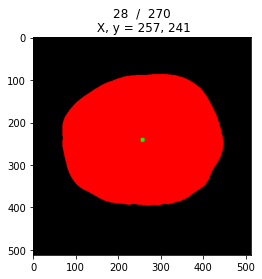

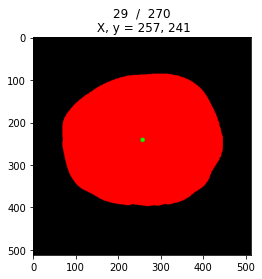

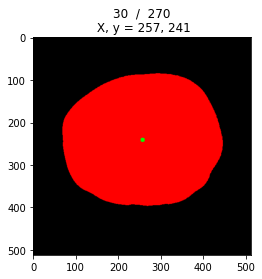

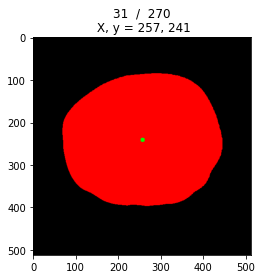

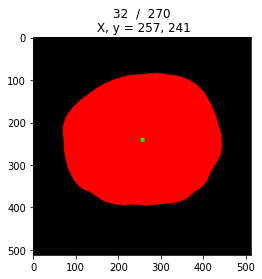

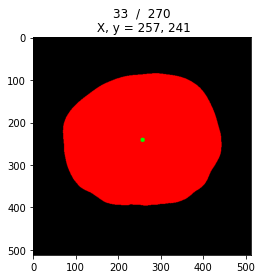

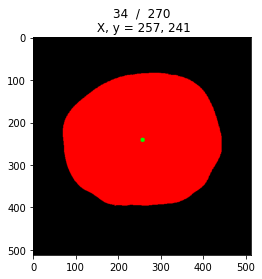

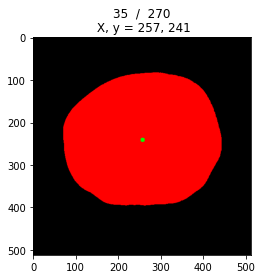

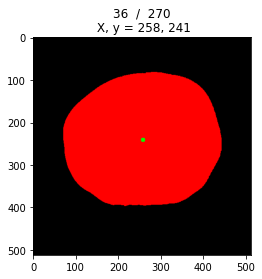

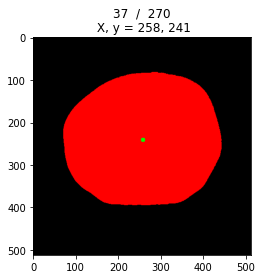

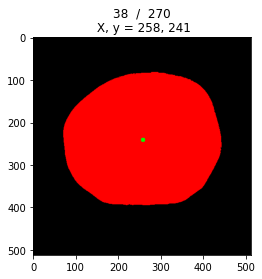

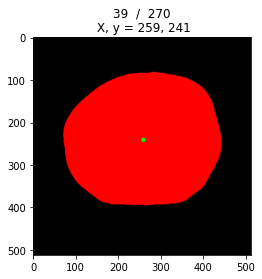

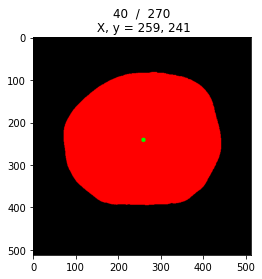

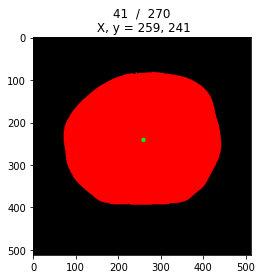

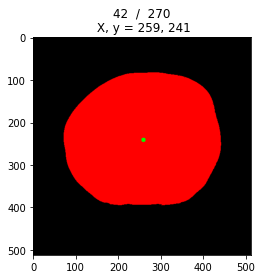

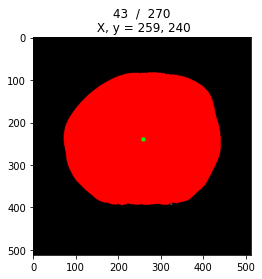

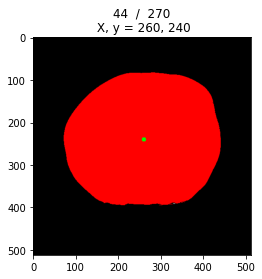

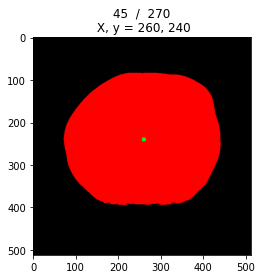

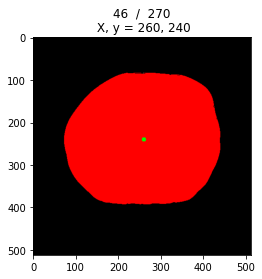

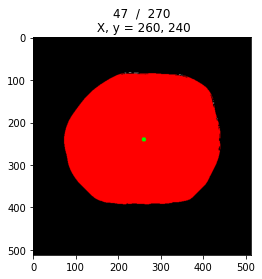

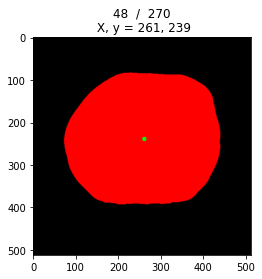

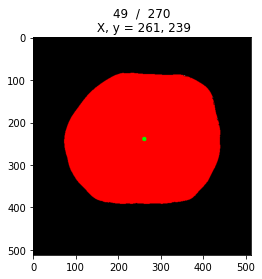

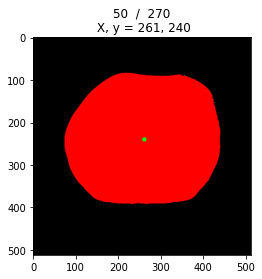

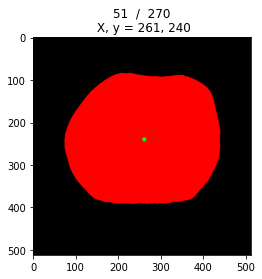

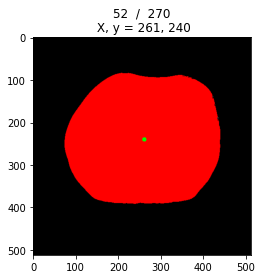

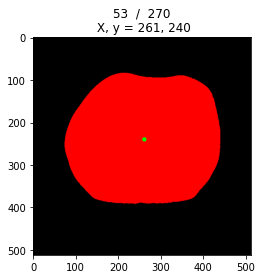

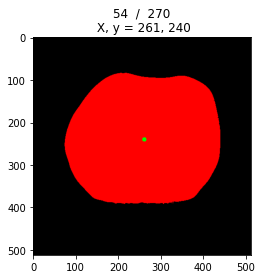

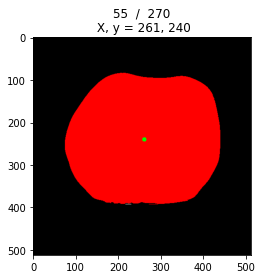

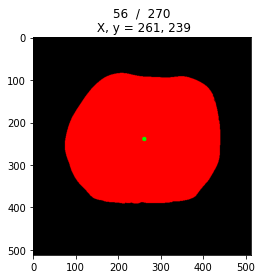

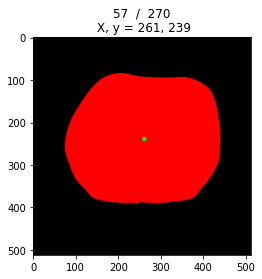

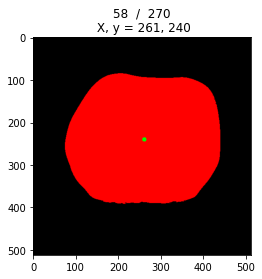

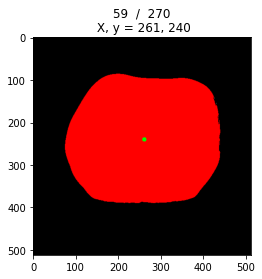

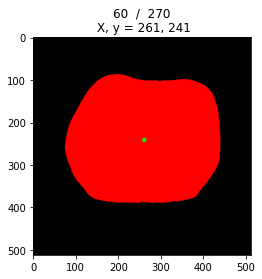

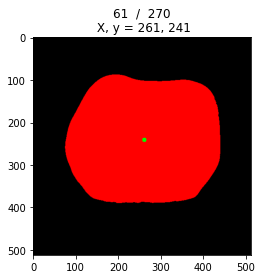

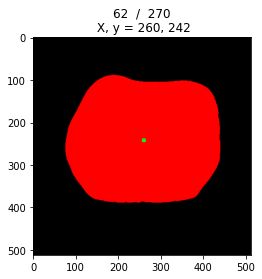

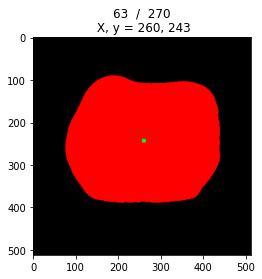

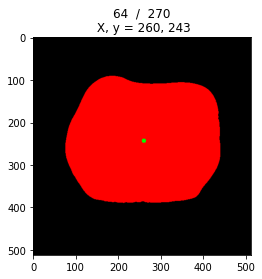

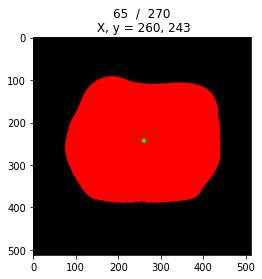

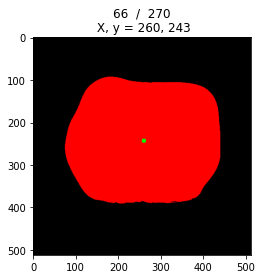

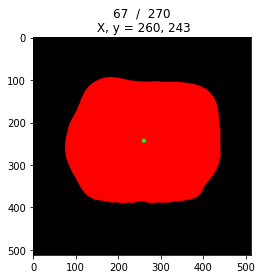

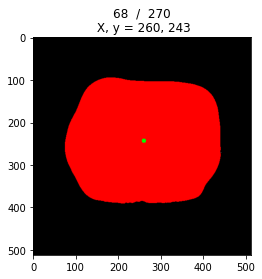

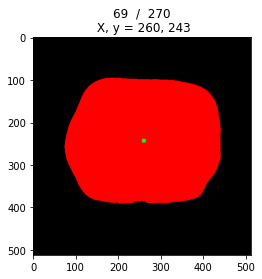

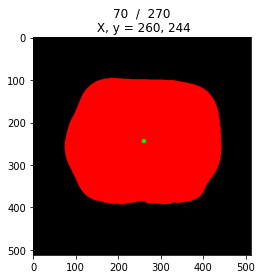

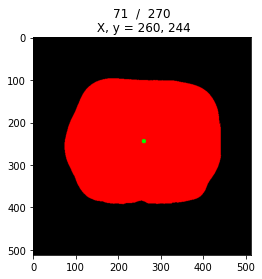

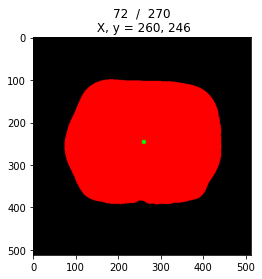

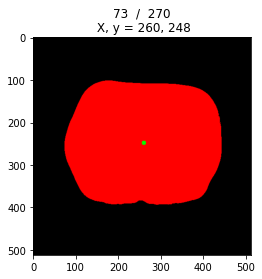

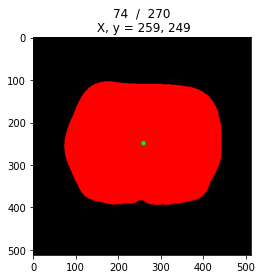

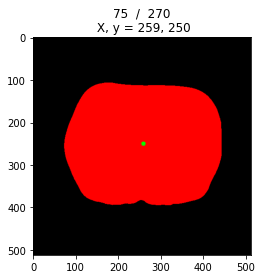

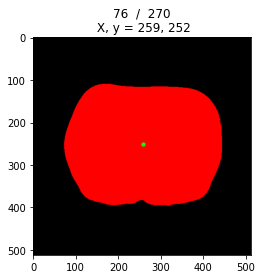

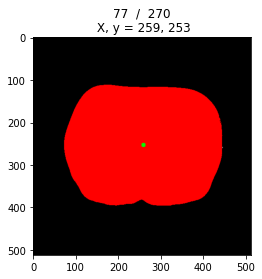

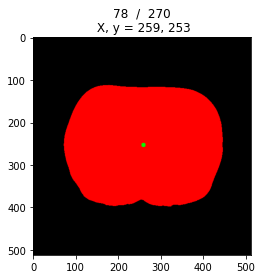

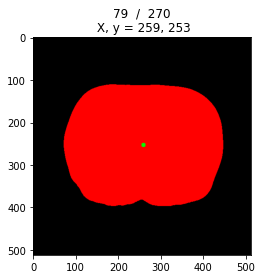

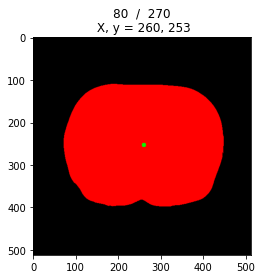

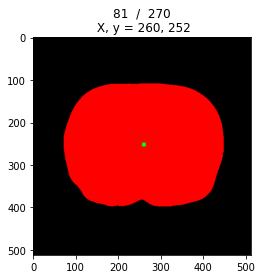

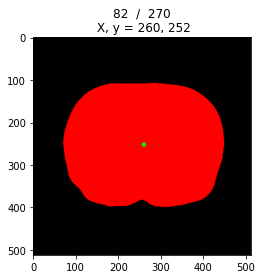

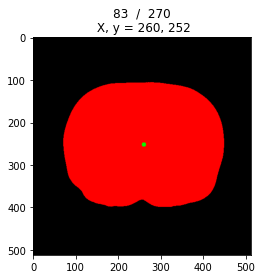

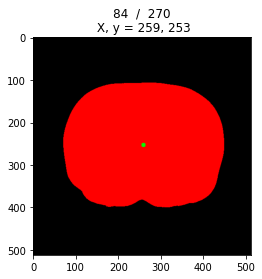

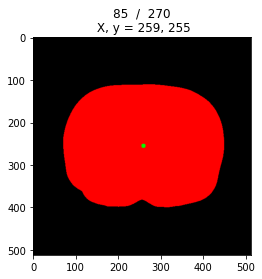

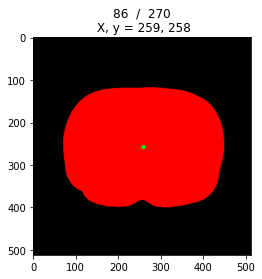

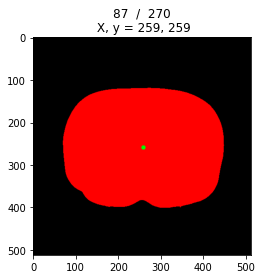

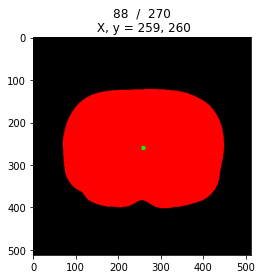

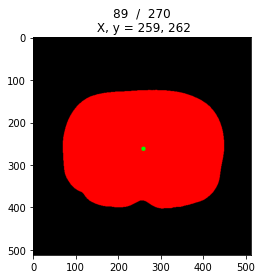

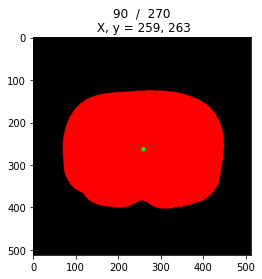

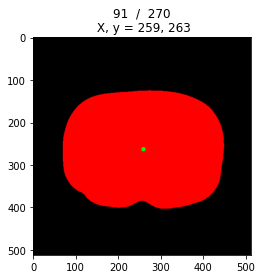

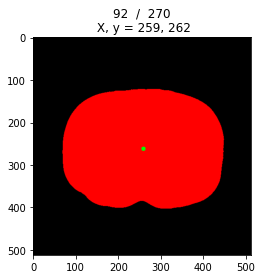

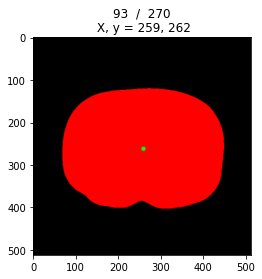

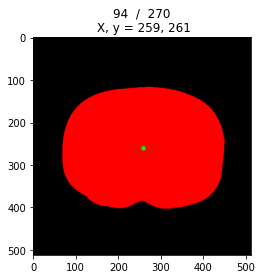

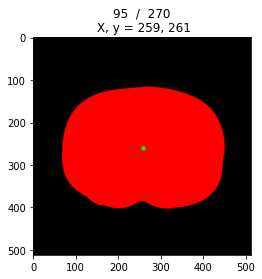

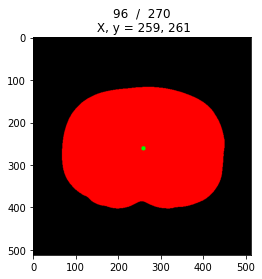

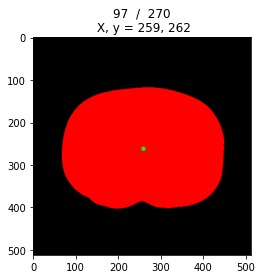

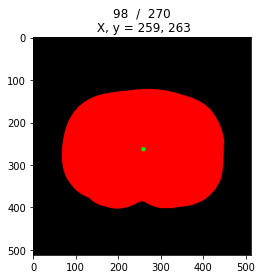

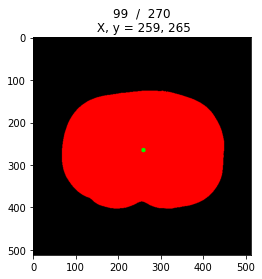

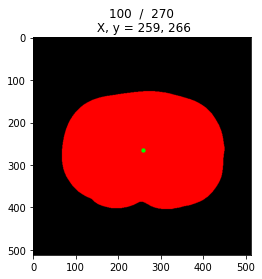

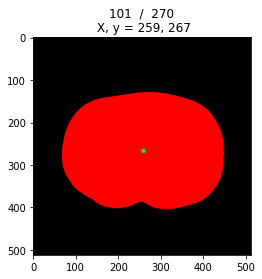

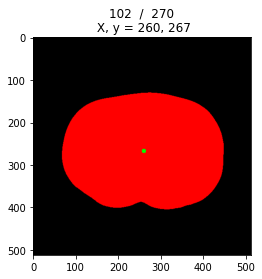

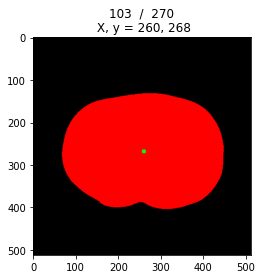

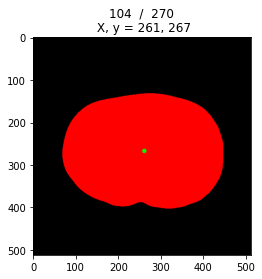

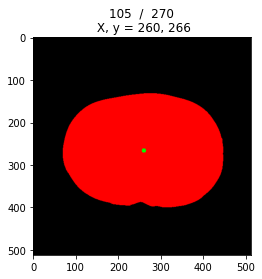

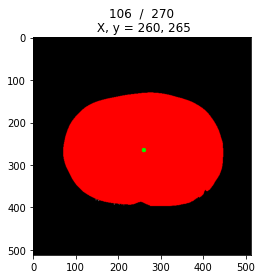

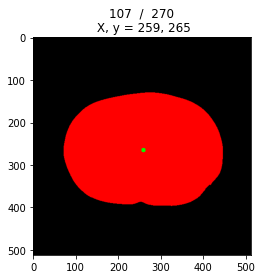

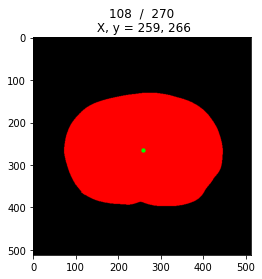

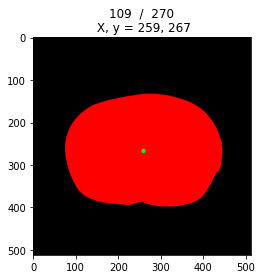

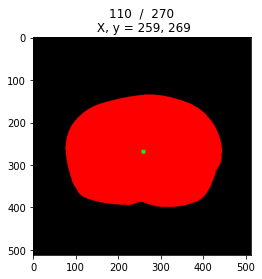

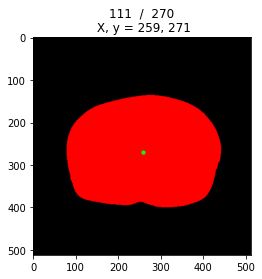

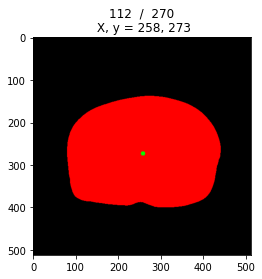

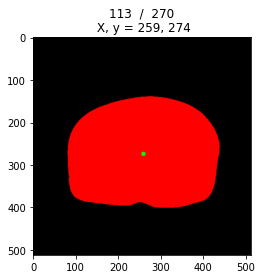

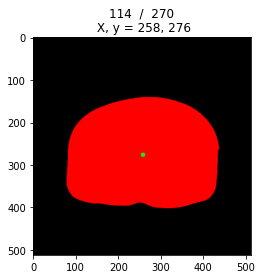

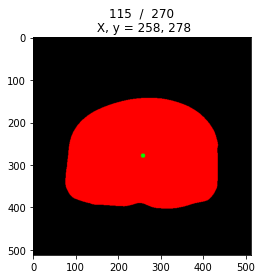

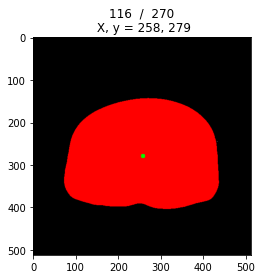

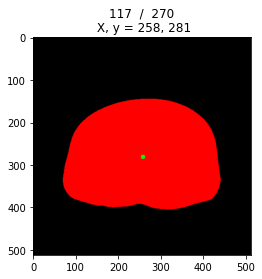

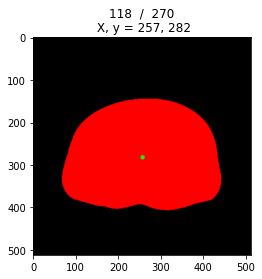

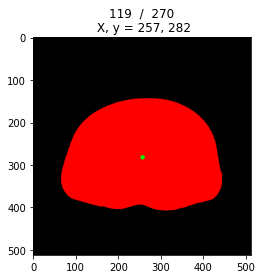

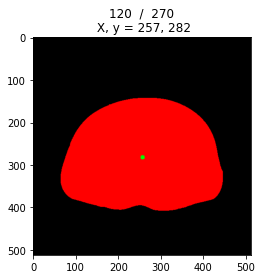

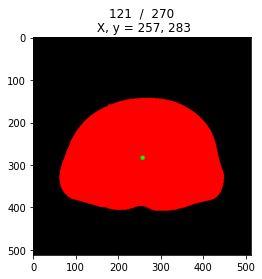

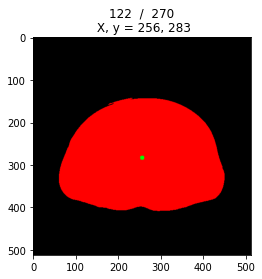

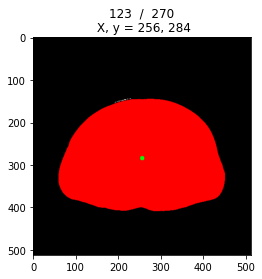

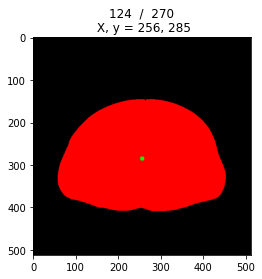

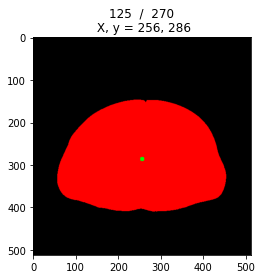

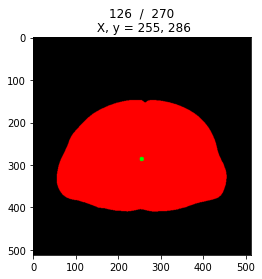

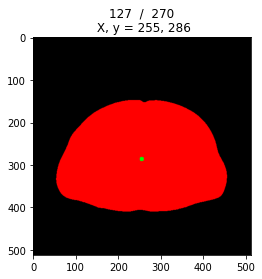

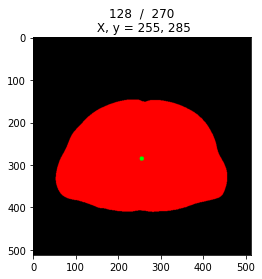

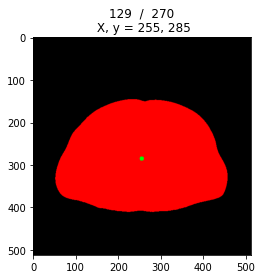

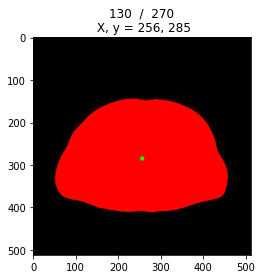

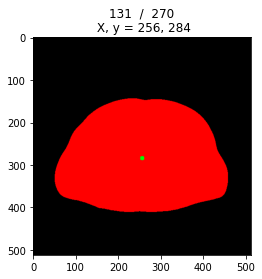

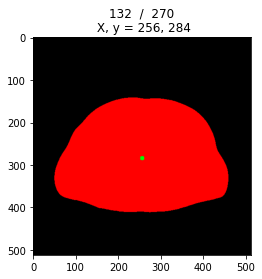

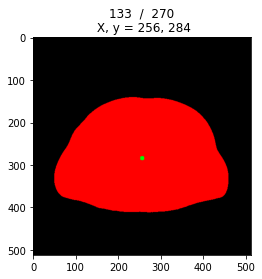

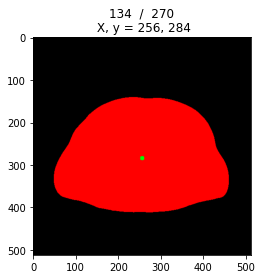

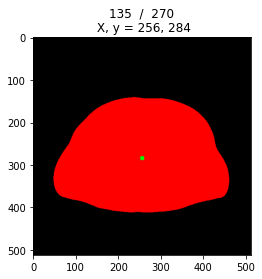

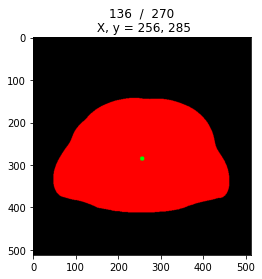

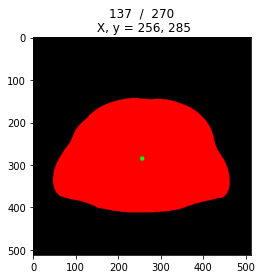

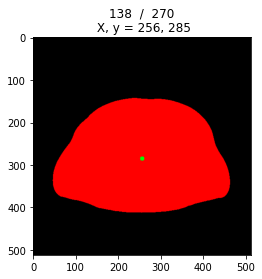

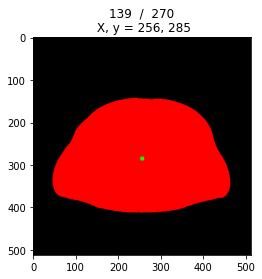

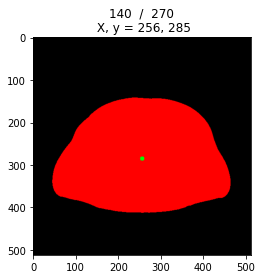

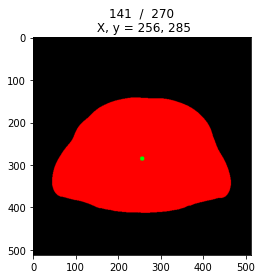

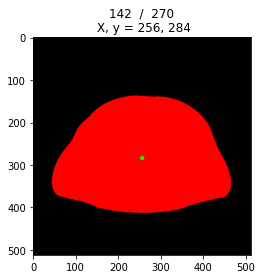

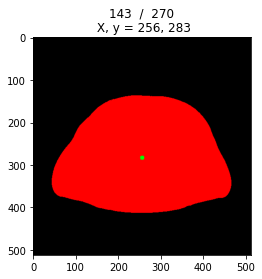

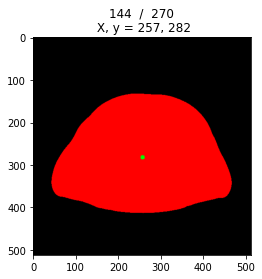

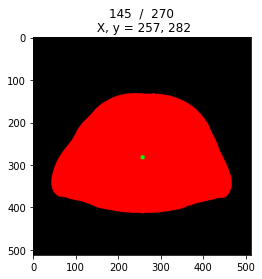

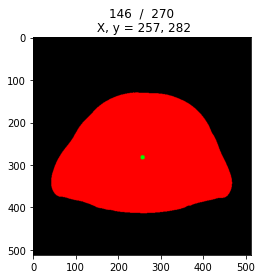

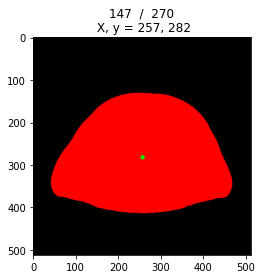

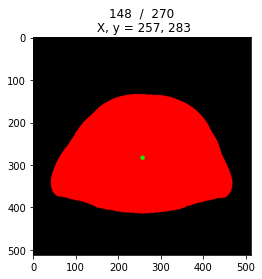

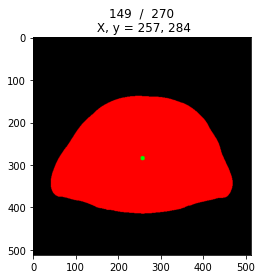

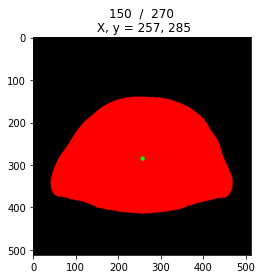

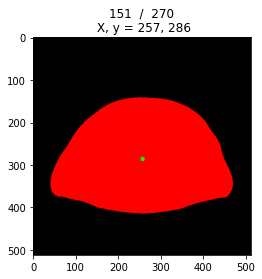

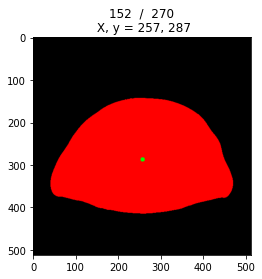

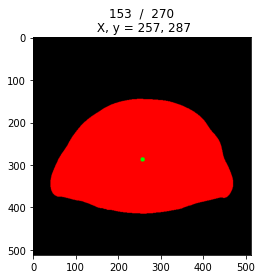

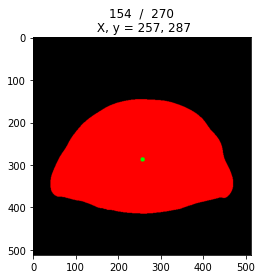

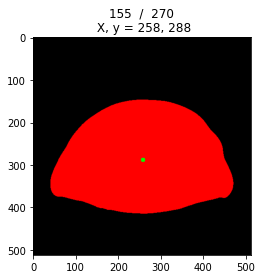

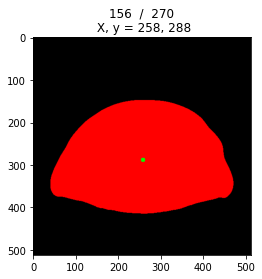

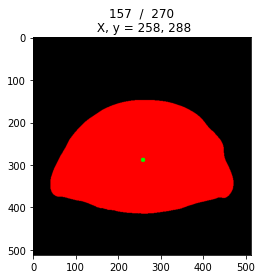

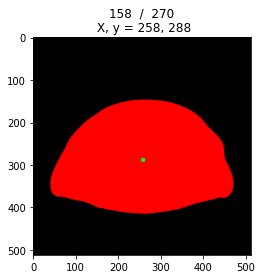

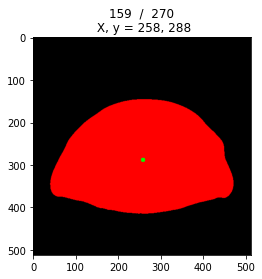

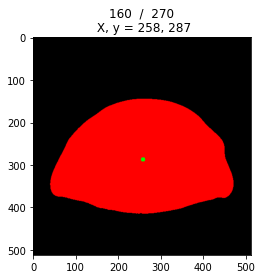

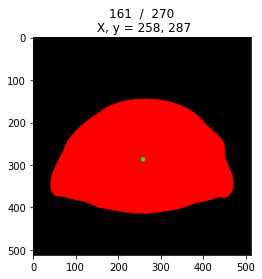

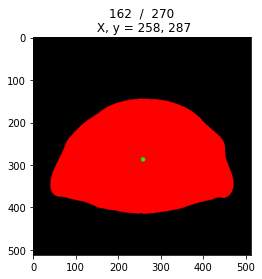

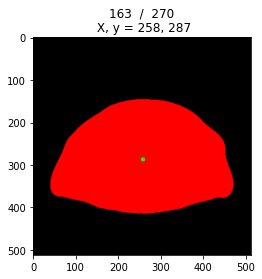

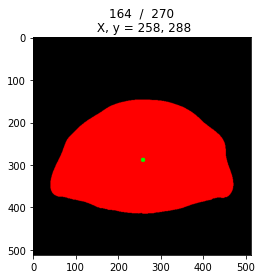

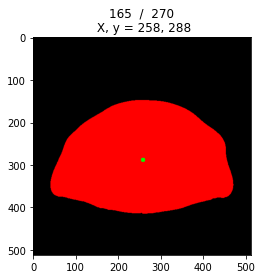

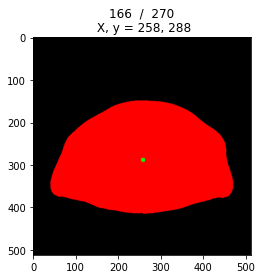

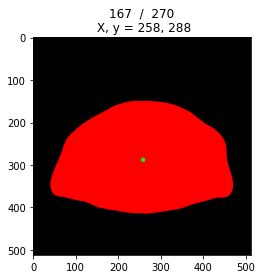

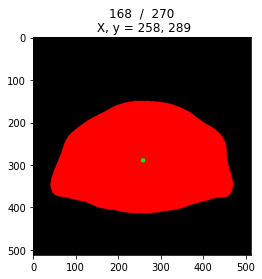

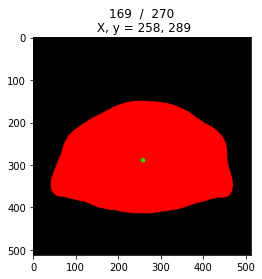

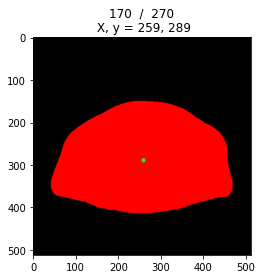

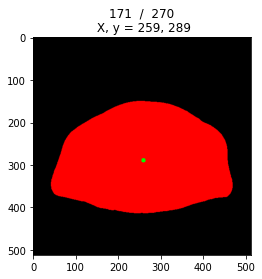

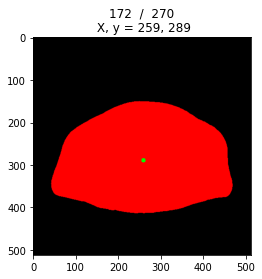

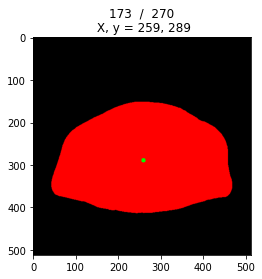

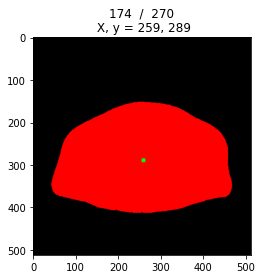

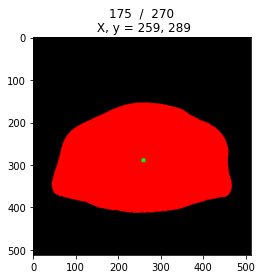

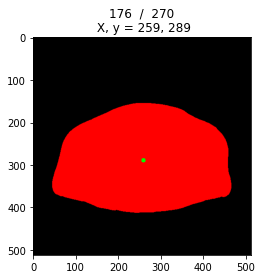

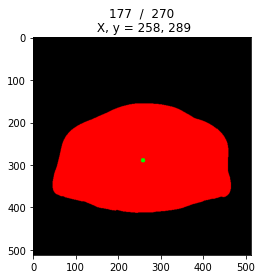

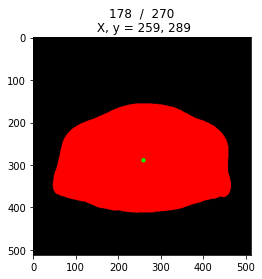

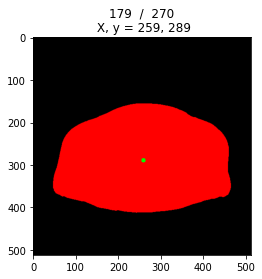

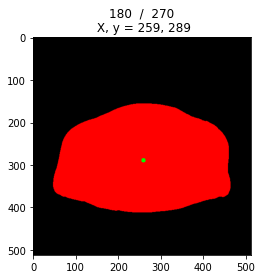

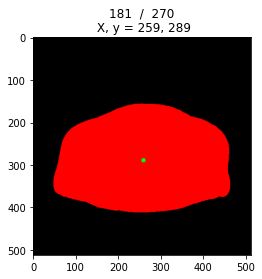

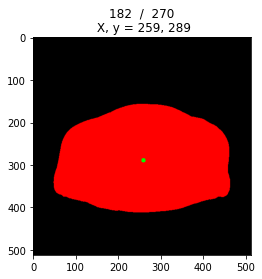

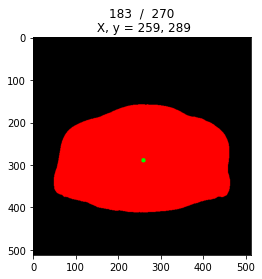

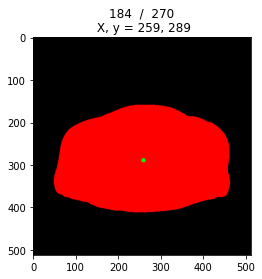

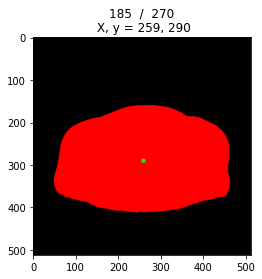

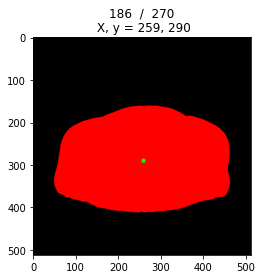

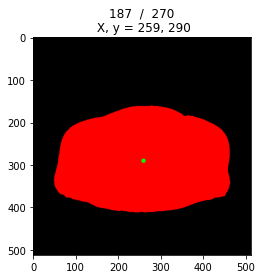

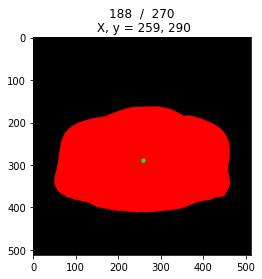

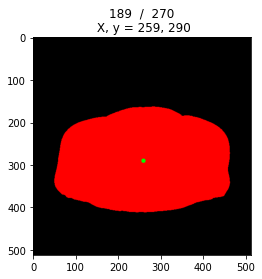

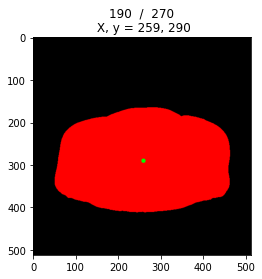

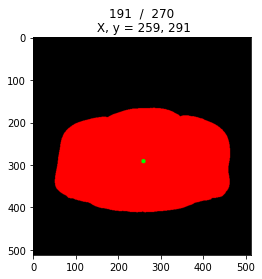

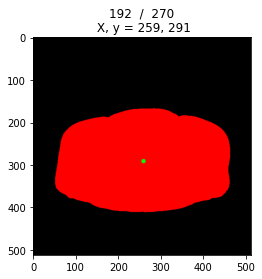

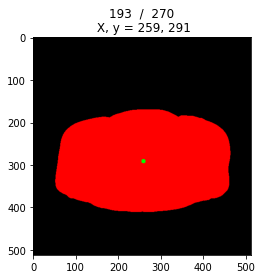

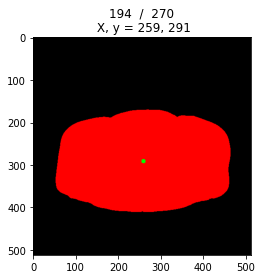

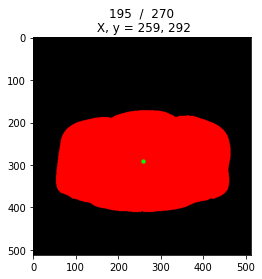

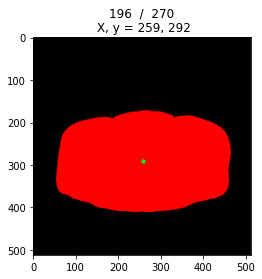

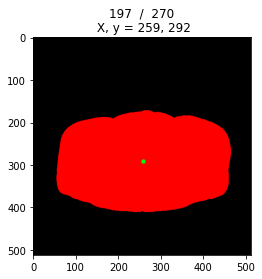

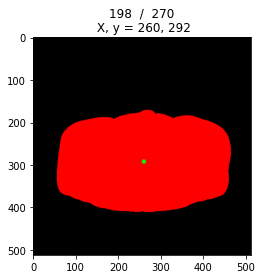

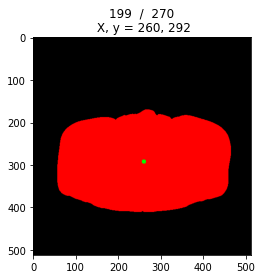

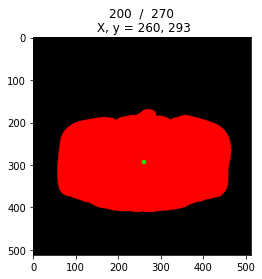

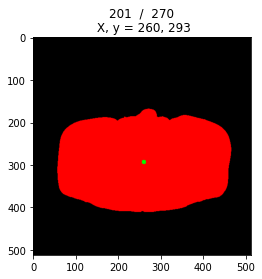

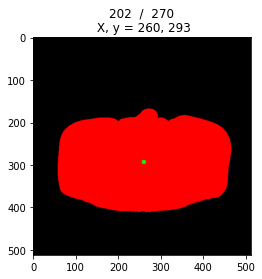

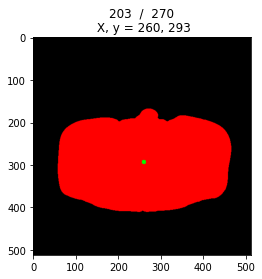

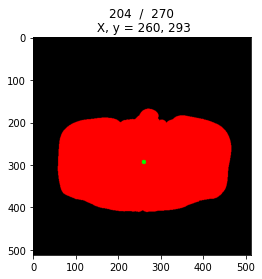

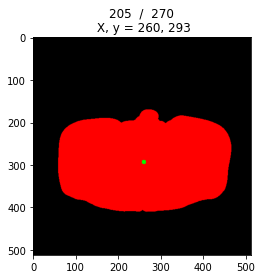

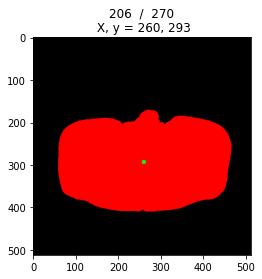

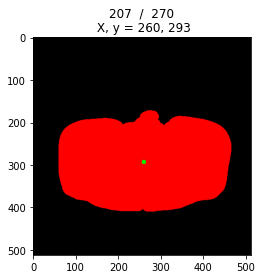

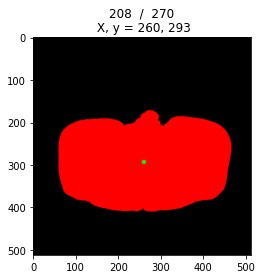

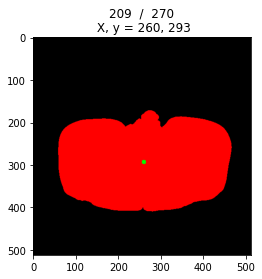

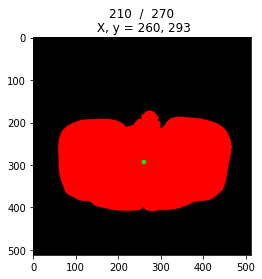

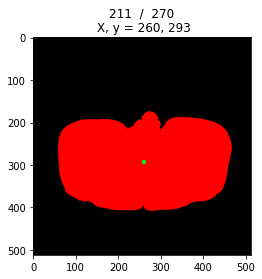

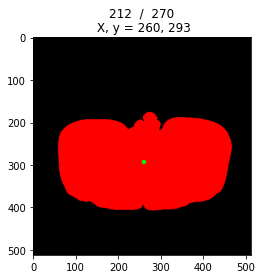

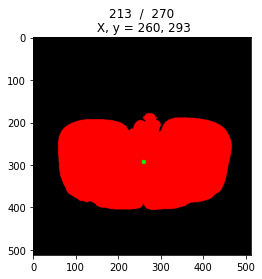

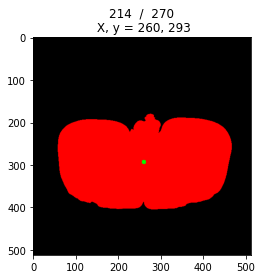

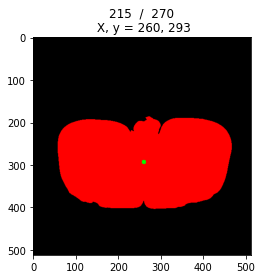

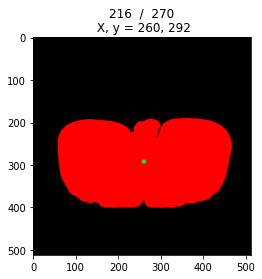

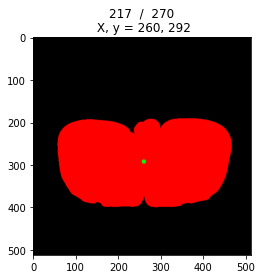

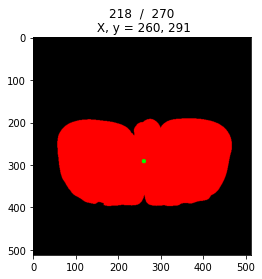

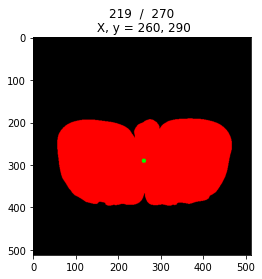

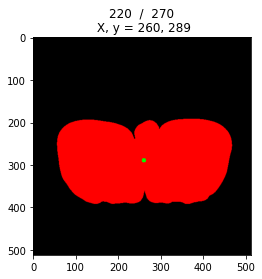

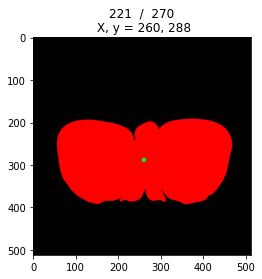

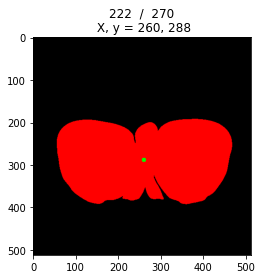

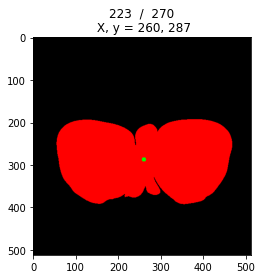

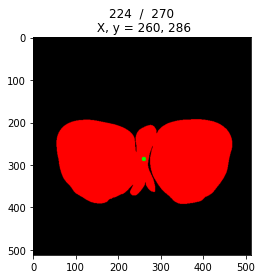

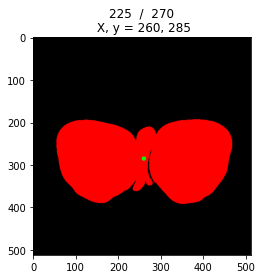

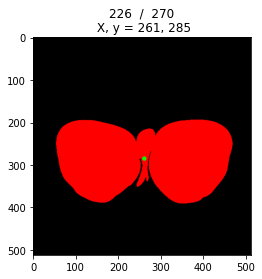

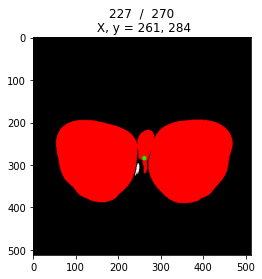

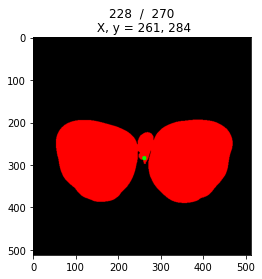

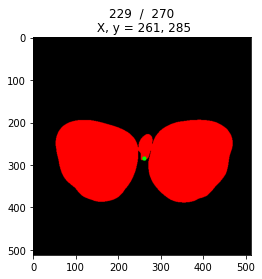

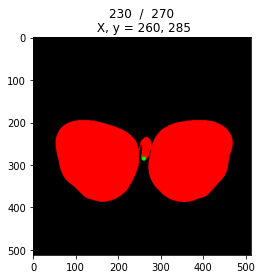

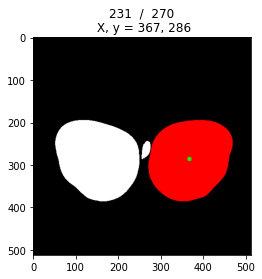

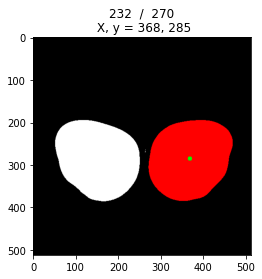

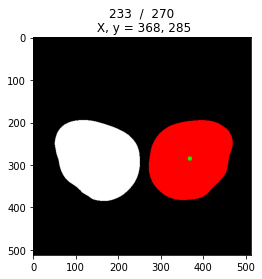

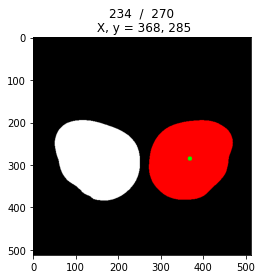

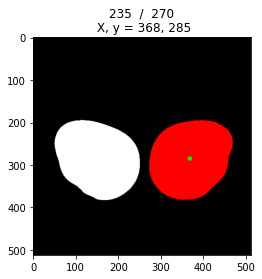

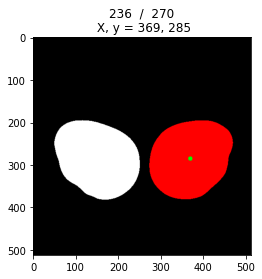

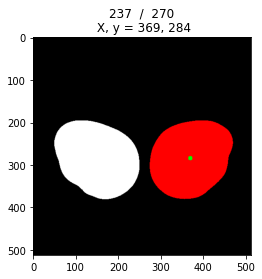

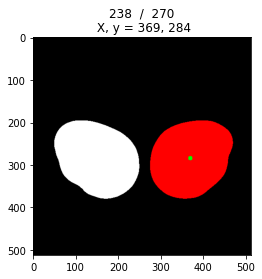

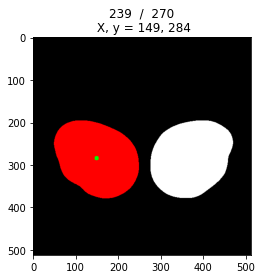

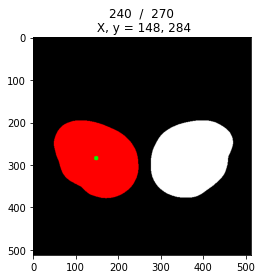

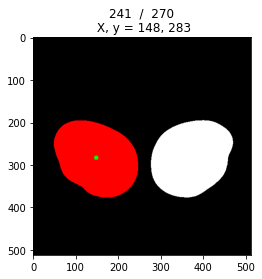

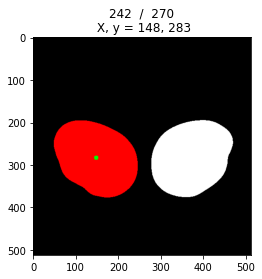

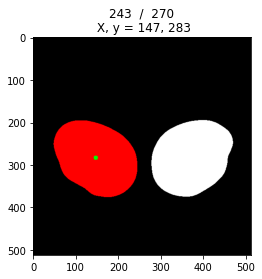

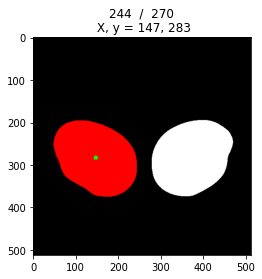

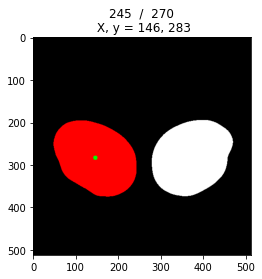

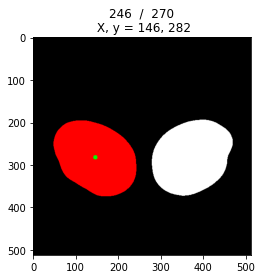

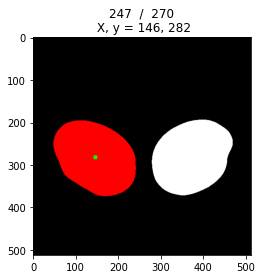

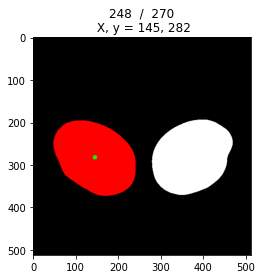

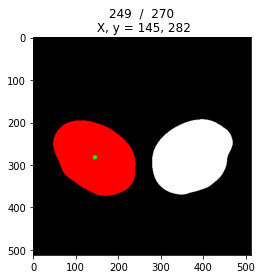

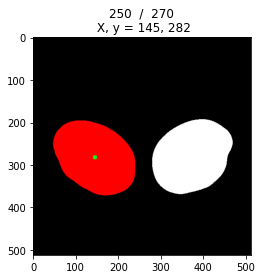

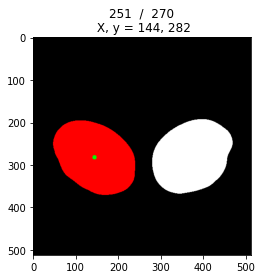

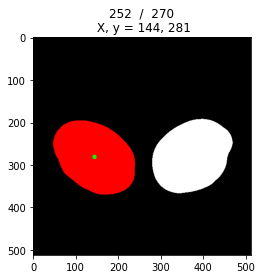

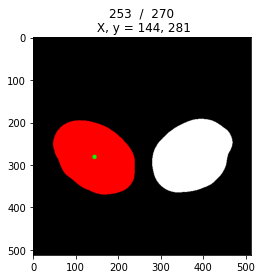

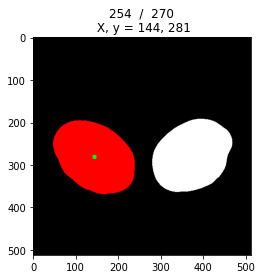

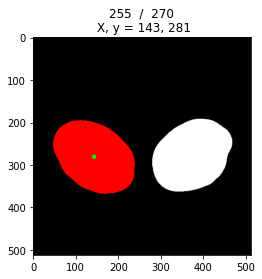

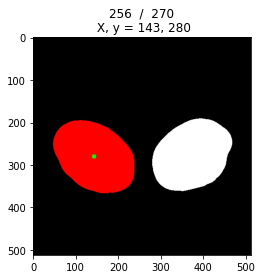

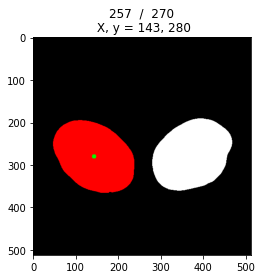

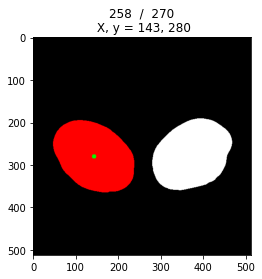

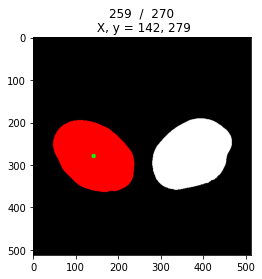

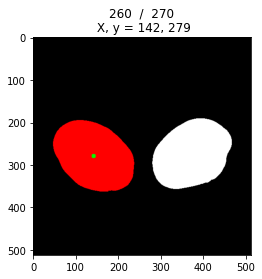

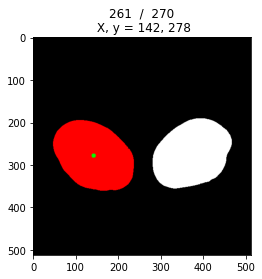

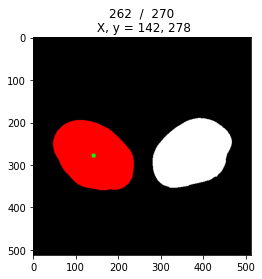

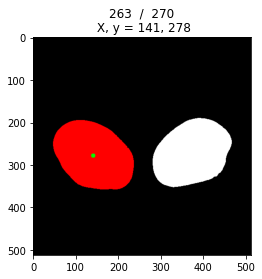

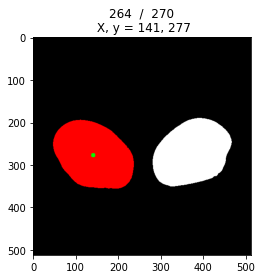

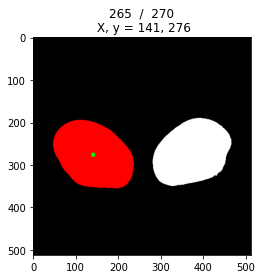

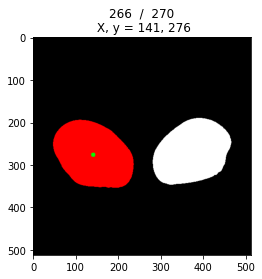

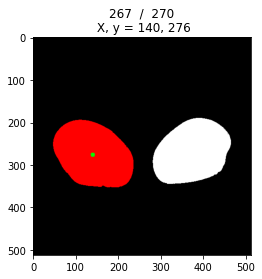

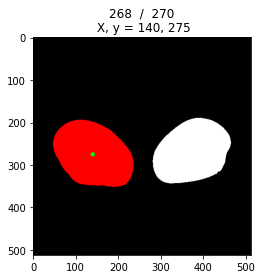

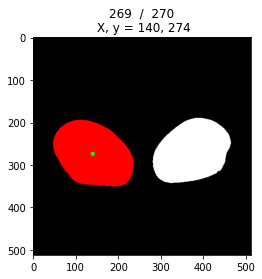

In [ ]:
LIST_AREA = []

for j, elem3 in enumerate(LIST_3CH_IMG):
    temp_cnt = LIST_MASK_CNT[j]
    temp_areas = []
    if len(temp_cnt) != 1:
        for k, elem4 in enumerate(temp_cnt):
            # cv2.drawContours(elem3, temp_cnt, k, COLOR_SET[k%3], -1)
            __area = cv2.contourArea(temp_cnt[k])
            temp_areas.append(__area)
    else:
        # cv2.drawContours(elem3, temp_cnt, 0, COLOR_SET[0], -1)
        __area = cv2.contourArea(temp_cnt[0])
        temp_areas.append(__area)
    LIST_AREA.append([j, temp_areas])

LIST_TO_ARGMAX = []

for k, elem in enumerate(LIST_AREA):
    tmp_num = np.argmax(elem[1])
    LIST_TO_ARGMAX.append([k, tmp_num])

LIST_MOMENTS = []

for m, elem in enumerate(LIST_TO_ARGMAX):
    temp_cnt = LIST_MASK_CNT[m][elem[1]]
    temp_moment = cv2.moments(temp_cnt)
    temp_cx = int(temp_moment['m10']/temp_moment['m00'])
    temp_cy = int(temp_moment['m01']/temp_moment['m00'])
    LIST_MOMENTS.append([m, temp_cx, temp_cy])



# for elem5 in LIST_PLT_IMGS:
#     plt.imshow(elem5)
#     plt.show()
#     plt.close()

# 150-320

LIST_MOMENTS_SEL = LIST_MOMENTS[150:321]

result = np.mean(LIST_MOMENTS_SEL, axis=0)

for l, elem in enumerate(LIST_3CH_IMG):
    temp_img = LIST_3CH_IMG[l]
    cv2.drawContours(temp_img, LIST_MASK_CNT[l], LIST_TO_ARGMAX[l][1], (255, 0, 0), -1)
    cv2.circle(temp_img, (LIST_MOMENTS[l][1], LIST_MOMENTS[l][2]), 5, (0, 255, 0), -1)
    plt.imshow(temp_img)
    plt.title("%d  /  %d\n X, y = %d, %d"%(l, len(LIST_3CH_IMG), LIST_MOMENTS[l][1], LIST_MOMENTS[l][2]))
    plt.show()
    plt.close()